# Home Climate Data

## Get everything ready

In [46]:
import pandas as pd
import json

In [47]:
with open("/Users/benjamin/dev/climate_sensor/climate_data.json", "r") as fp:
    data = json.load(fp)
    df = pd.DataFrame(data)
    print(df)

                              timestamp  location  temperature  humidity
0            2021-08-29 02:05:34.984113  basement         21.0      73.0
1            2021-08-29 02:05:38.513170  basement         20.0      72.0
2            2021-08-29 02:05:42.042295  basement         20.0      72.0
3            2021-08-29 02:05:45.573211  basement         21.0      73.0
4            2021-08-29 02:05:49.103348  basement         20.0      72.0
...                                 ...       ...          ...       ...
74370  2021-09-11 18:48:17.844431+00:00  basement         24.0      59.0
74371  2021-09-11 18:48:33.584704+00:00  basement         24.0      59.0
74372  2021-09-11 18:48:49.393430+00:00  basement         24.0      59.0
74373  2021-09-11 18:49:05.086939+00:00  basement         24.0      59.0
74374  2021-09-11 18:49:20.804220+00:00  basement         24.0      59.0

[74375 rows x 4 columns]


## Covert the timestamp to a datetime data type

In [48]:
df['timestamp'] =  pd.to_datetime(df['timestamp'], utc=True, infer_datetime_format=True).dt.tz_convert('Canada/Eastern') 

## Plot the raw data

In [49]:
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt

In [50]:
x = mdates.date2num(df['timestamp'])
y= df['humidity']
z = np.polyfit(x, y, 2)
p = np.poly1d(z)

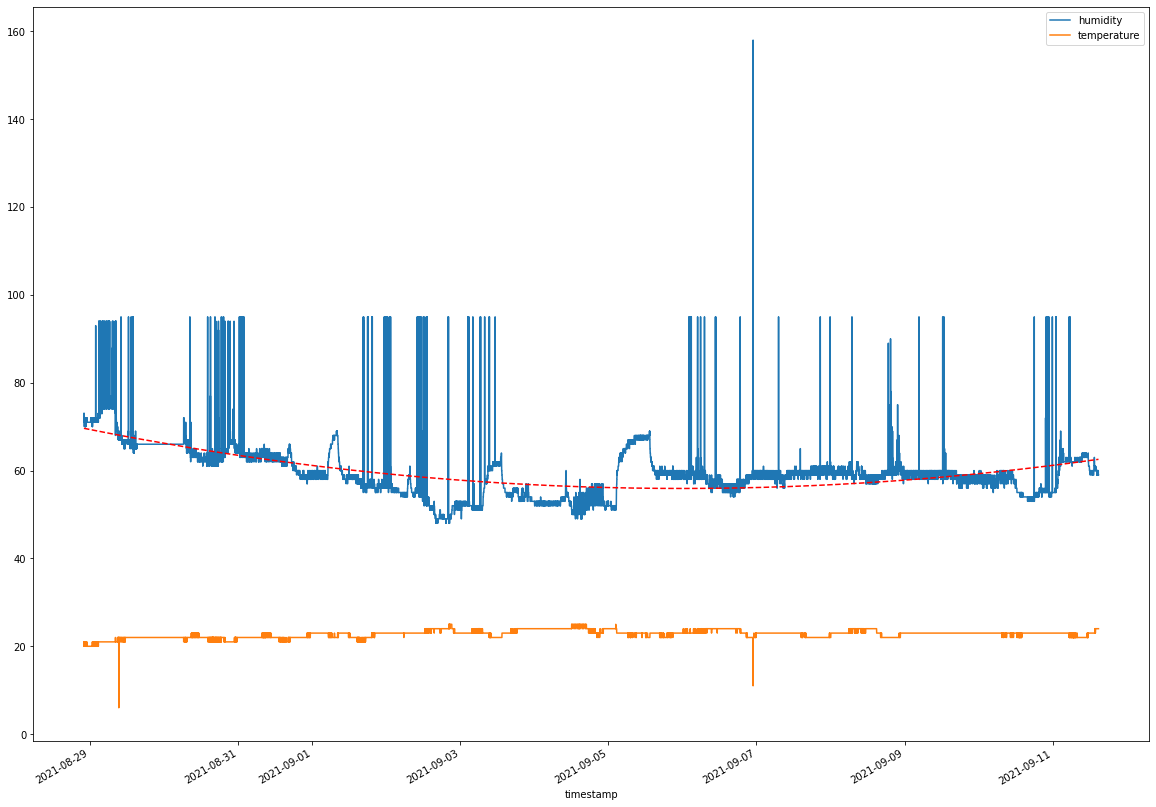

In [51]:
df.plot(x='timestamp', y=['humidity', 'temperature'], kind='line', figsize=(20,15))
plt.plot(x, p(x), "r--")

## Group the time into 10 minute intervals
Smooths out the data and aggregates to the mean to avoid the outlier data

In [52]:
agg_10m = df.groupby(pd.Grouper(key='timestamp', freq='10Min')).median()


In [53]:
agg_10m

,temperature,humidity
timestamp,,
2021-08-28 22:00:00-04:00,21.0,72.0
2021-08-28 22:10:00-04:00,21.0,71.0
2021-08-28 22:20:00-04:00,21.0,71.0
2021-08-28 22:30:00-04:00,21.0,71.0
2021-08-28 22:40:00-04:00,21.0,72.0
...,...,...
2021-09-11 14:00:00-04:00,24.0,60.0
2021-09-11 14:10:00-04:00,24.0,60.0
2021-09-11 14:20:00-04:00,24.0,60.0


## 📈 Graph time

<AxesSubplot:title={'center':'Temperature and Humidity'}, xlabel='timestamp'>

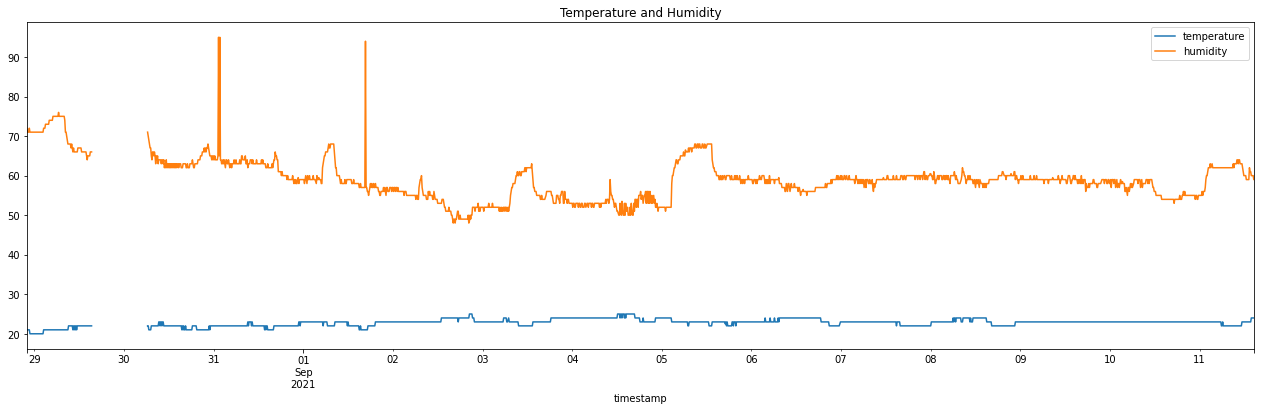

In [54]:
agg_10m.plot(y=['temperature', 'humidity'], kind='line', title="Temperature and Humidity", figsize=(22,6))

[18868.08721046 18868.08725131 18868.08729216 ... 18881.78390502
 18881.78408665 18881.78426857]: [69.6213349  69.62119634 69.62105781 ... 62.56144951 62.56187835
 62.56230786]


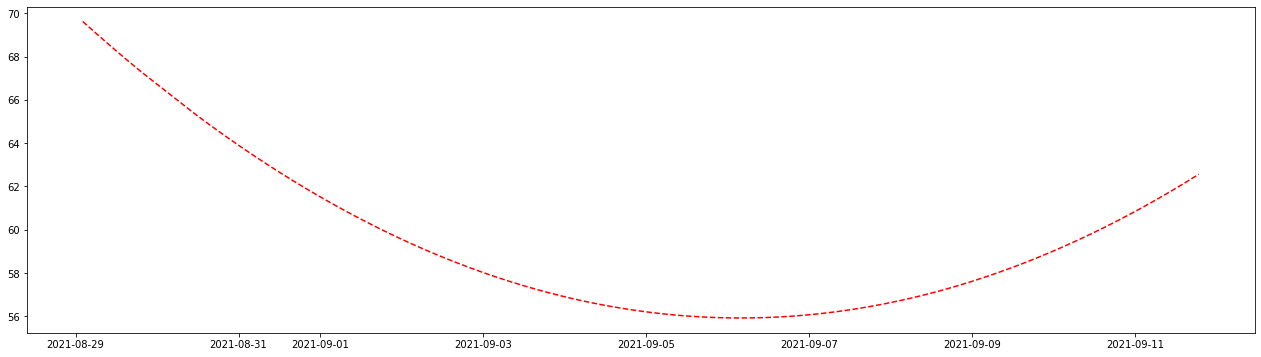

In [55]:
plt.figure(figsize=(22,6))
plt.plot(mdates.num2date(x), p(x), "r--")
print(f"{x}: {p(x)}")